In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,classification_report

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data.shape

(595212, 59)

In [4]:
data.duplicated().sum()

0

<AxesSubplot:>

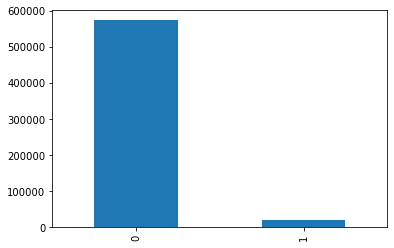

In [5]:
data.target.value_counts().plot(kind='bar')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
data.corr()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,...,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.000022,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.000093,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.002473,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,-0.000479,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995


In [8]:
X = data.drop(['target','id'], axis = 1)
y = data['target']
X.shape, y.shape

((595212, 57), (595212,))

In [9]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [10]:
#Smote the data
X_smote, y_smote = smote.fit_resample(X,y)

In [11]:
y_smote.value_counts()

0    573518
1    573518
Name: target, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.4)

In [14]:
y_train.value_counts()

1    344319
0    343902
Name: target, dtype: int64

In [15]:
from sklearn.feature_selection import VarianceThreshold


#Removing constant and quasi-constant

In [16]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)
X_train_filter.shape, X_test_filter.shape

((688221, 51), (458815, 51))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler().fit(X_train_filter)
X_train_unique = scaler.transform(X_train_filter)
X_test_unique = scaler.transform(X_test_filter)
X_train_unique = pd.DataFrame(X_train_filter)
X_test_unique = pd.DataFrame(X_test_filter)
X_train_unique.shape, X_test_unique.shape

((688221, 51), (458815, 51))

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LR=LogisticRegression()

In [21]:
%%time
LR.fit(X_train_unique,y_train)
y_predict=LR.predict(X_test_unique)
#print('Train accuracy:',accuracy_score(y_train,y_predict))
print('Test accuracy:',accuracy_score(y_test,y_predict))

Test accuracy: 0.8663535411876246
Wall time: 14.4 s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("confusion matrix :",confusion_matrix(y_test,y_predict))

confusion matrix : [[207322  22294]
 [ 39025 190174]]


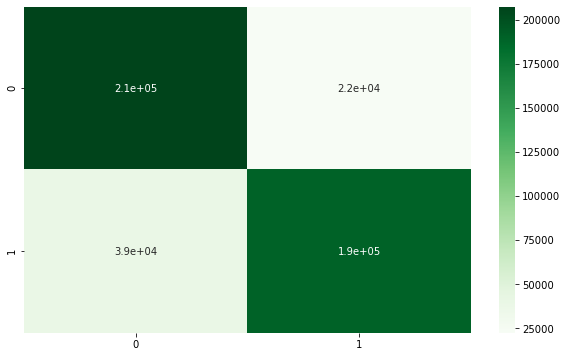

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Greens')
plt.show()


In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87    229616
           1       0.90      0.83      0.86    229199

    accuracy                           0.87    458815
   macro avg       0.87      0.87      0.87    458815
weighted avg       0.87      0.87      0.87    458815



In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
roc_auc_score = roc_auc_score(y_test, y_predict)
roc_auc_score

0.8663202884566968

Text(0.5, 1.0, 'Logistic Regression')

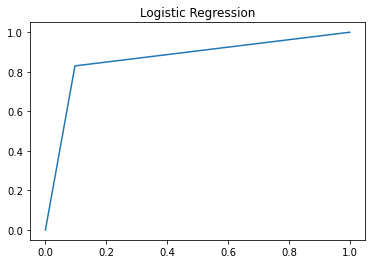

In [26]:
pr_fpr, pr_tpr, _ = roc_curve(y_test, y_predict)
import matplotlib.pyplot as plt
plt.plot(pr_fpr,pr_tpr)
plt.title('Logistic Regression')

#### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
%%time
RF=RandomForestClassifier(n_estimators=50,random_state=0)
RF.fit(X_train_unique,y_train)
y_predict=RF.predict(X_test_unique)
#print('Train accuracy:',accuracy_score(y_train,y_predict))
print('Test accuracy:',accuracy_score(y_test,y_predict))

Test accuracy: 0.9765504615149897
Wall time: 4min 18s


In [29]:
pd.crosstab(y_test,y_predict)

col_0,0,1
target,,
0,228583,1033
1,9726,219473


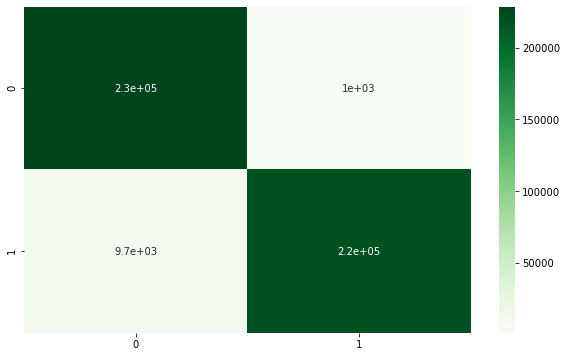

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Greens')

plt.show()



In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    229616
           1       1.00      0.96      0.98    229199

    accuracy                           0.98    458815
   macro avg       0.98      0.98      0.98    458815
weighted avg       0.98      0.98      0.98    458815



In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
roc_auc_score = roc_auc_score(y_test, y_predict)
roc_auc_score

0.9765332222348865

Text(0.5, 1.0, 'Random Forest Classifier')

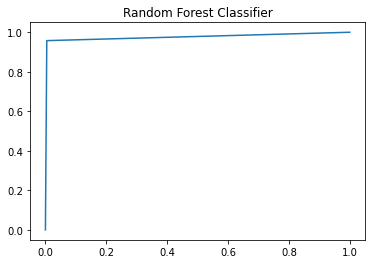

In [33]:
pr_fpr, pr_tpr, _ = roc_curve(y_test, y_predict)
import matplotlib.pyplot as plt
plt.plot(pr_fpr,pr_tpr)
plt.title("Random Forest Classifier")

#### XGBoost Classifier

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [35]:
%%time
XGB=XGBClassifier(learning_rate=0.4,n_estimators=100,random_state=20)
XGB.fit(X_train_unique,y_train)
y_predict=XGB.predict(X_test_unique)
y_train_predict=XGB.predict(X_train_unique)
#print('Train accuracy:',accuracy_score(y_train,y_predict))
print('Test accuracy:',accuracy_score(y_test,y_predict))

Test accuracy: 0.9807395137473709
Wall time: 3min 14s


In [36]:
cnf_matrix=confusion_matrix(y_test,y_predict)
print(cnf_matrix)

[[229547     69]
 [  8768 220431]]


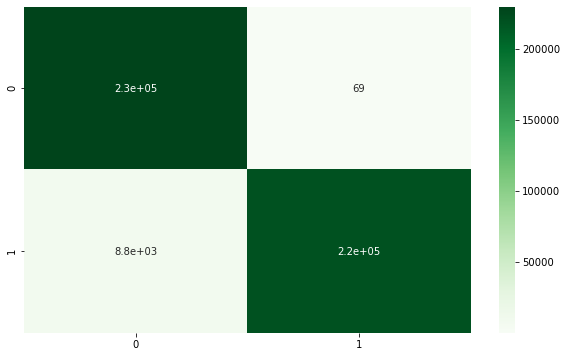

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Greens')
plt.show()

In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    229616
           1       1.00      0.96      0.98    229199

    accuracy                           0.98    458815
   macro avg       0.98      0.98      0.98    458815
weighted avg       0.98      0.98      0.98    458815



In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
roc_auc_score = roc_auc_score(y_test, y_predict)
roc_auc_score

0.9807222660421989

Text(0.5, 1.0, 'XGB Classifier')

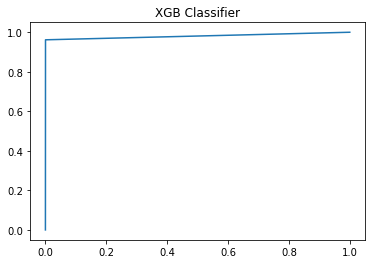

In [40]:
pr_fpr, pr_tpr, _ = roc_curve(y_test, y_predict)
import matplotlib.pyplot as plt
plt.plot(pr_fpr,pr_tpr)
plt.title("XGB Classifier")